In [3]:
## Import statement: pandas is a "package"
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.formula.api as smf


In [4]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

<AxesSubplot:xlabel='year', ylabel='gdp_cap'>

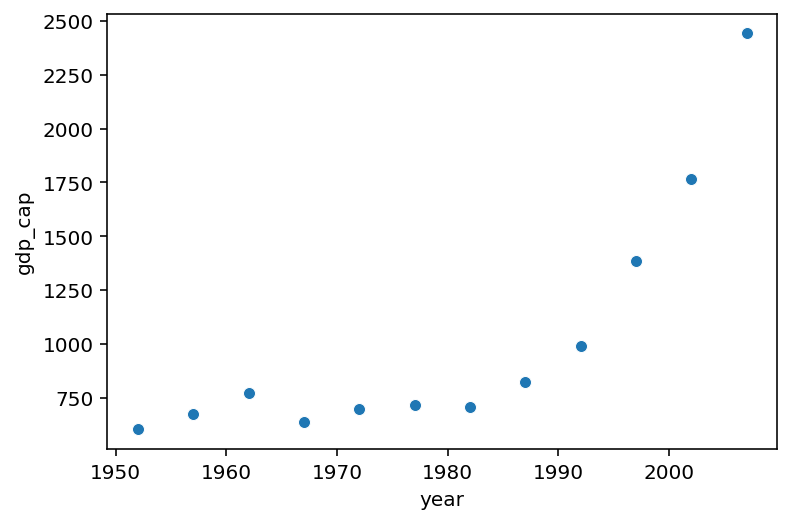

In [5]:
df_gapminder = pd.read_csv("data/viz/gapminder_full.csv")
df_vietnam = df_gapminder[df_gapminder['country'] == "Vietnam"]
sns.scatterplot(data = df_vietnam, x = "year", y = "gdp_cap")

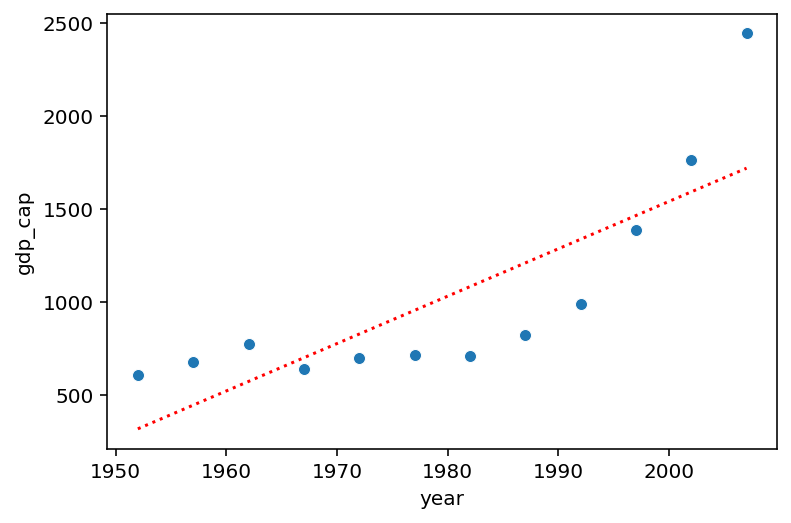

In [6]:
mod_linear = smf.ols(data = df_vietnam, formula = "gdp_cap ~ year").fit()
sns.scatterplot(data = df_vietnam, x = "year", y = "gdp_cap")
plt.plot(df_vietnam['year'], mod_linear.predict(), linestyle = "dotted", color = "red")


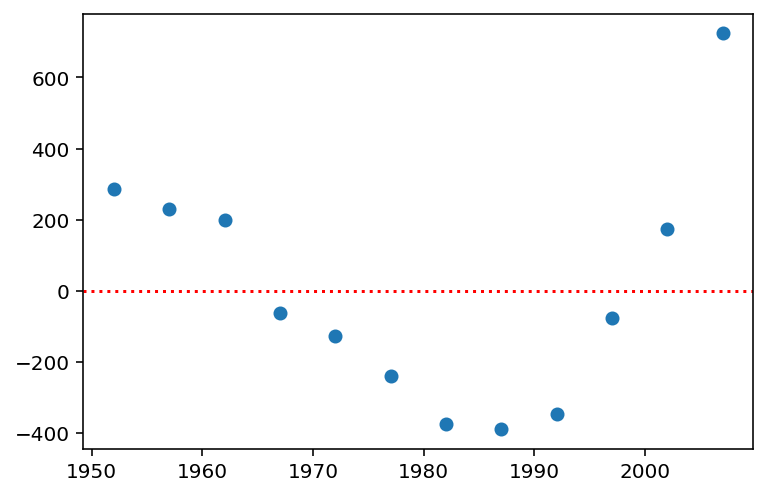

In [7]:
plt.scatter(df_vietnam['year'], mod_linear.resid)
plt.axhline(y = 0, linestyle = "dotted", color = "red")

In [8]:
mod_linear.params

Intercept   -49382.260375
year            25.460961
dtype: float64

$\Large Y = 25X - 49382$

$\Large Y = \beta_1X + \beta_0$

$\Large Y = \beta_2X^2 + \beta_1X + \beta_0$

In [11]:
df_vietnam['year_sq'] = df_vietnam['year'].values ** 2

/var/folders/pn/5zbmv0cj31v6hmyh53njhmdw0000gn/T/ipykernel_2351/2799483630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vietnam['year_sq'] = df_vietnam['year'].values ** 2


In [12]:
mod_poly = smf.ols(data = df_vietnam, formula = "gdp_cap ~ year + year_sq").fit()
mod_poly.params

Intercept    4.228126e+06
year        -4.296675e+03
year_sq      1.091724e+00
dtype: float64

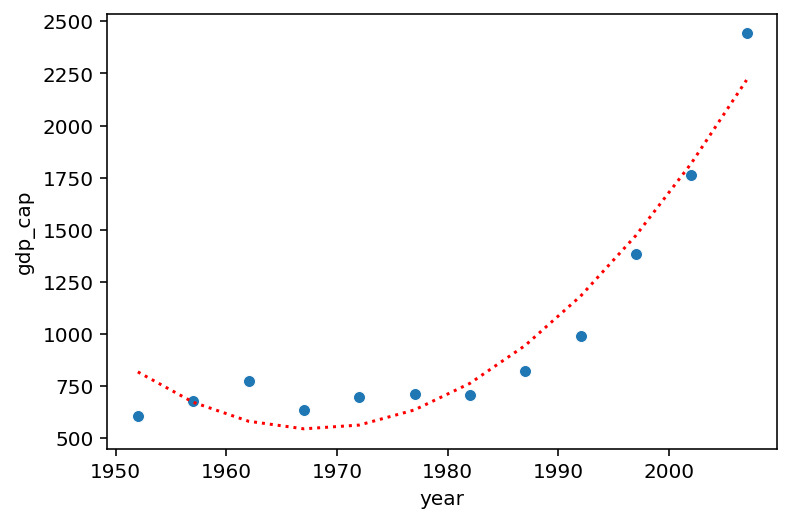

In [15]:
sns.scatterplot(data = df_vietnam, x = "year", y = 'gdp_cap')
plt.plot(df_vietnam['year'], mod_poly.predict(), linestyle = "dotted", color = "red")

In [18]:
mod_poly = smf.ols(data = df_vietnam, 
                   formula = "gdp_cap ~ year + I(year ** 2) + I(year ** 3)").fit()
mod_poly.params 

Intercept          3.211890
year            2119.158377
I(year ** 2)      -2.153293
I(year ** 3)       0.000547
dtype: float64

In [20]:
df_vietnam.shape

(12, 7)

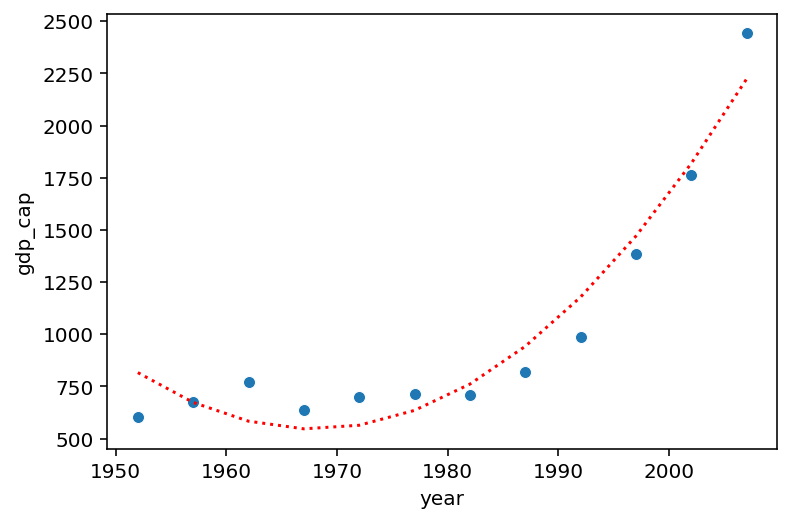

In [19]:
sns.scatterplot(data = df_vietnam, x = "year", y = 'gdp_cap')
plt.plot(df_vietnam['year'], mod_poly.predict(), linestyle = "dotted", color = "red")

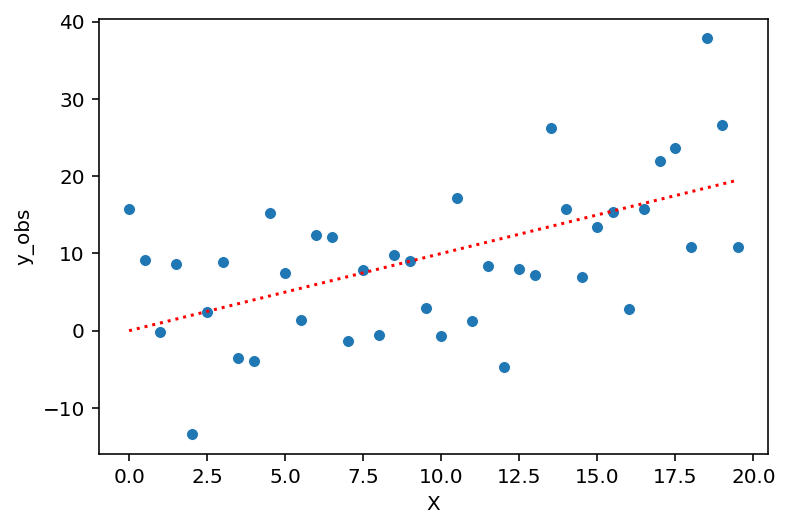

In [33]:
X = np.arange(0, 20, .5)
y = X
err = np.random.normal(scale = 8, size = len(X))
df = pd.DataFrame({'X': X, 'y_true': y, 'y_obs': y + err})
sns.scatterplot(data = df, x = "X", y = "y_obs")
plt.plot(X, y, linestyle = "dotted", color = "red")

In [34]:
mod_p10 = smf.ols(data = df, formula = "y_obs ~ X + I(X**2) + I(X**3) + I(X**4) + I(X**5) + I(X**6)  + I(X**7)  + I(X**8)  + I(X**9)  + I(X**10)").fit()


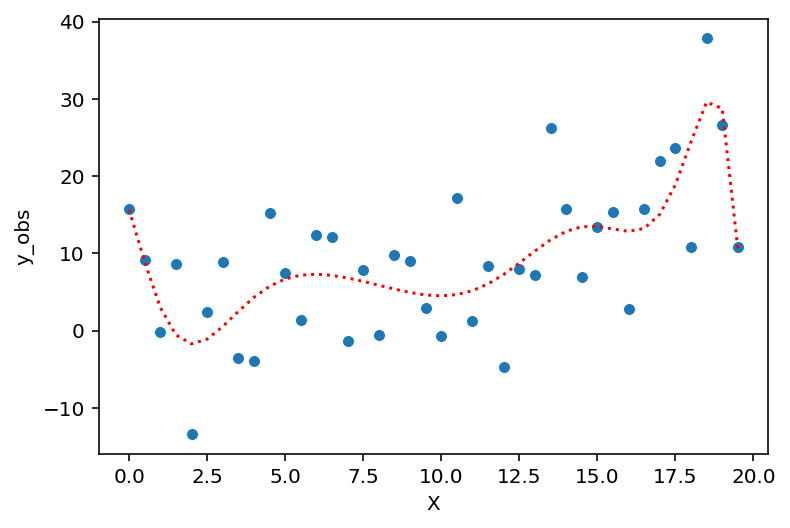

In [35]:
sns.scatterplot(data = df, x = "X", y = "y_obs")
plt.plot(X, mod_p10.predict(), linestyle = "dotted", color = "red")